In [2]:
%run c://Users/a/apython/__init__/Normal_for_DSS.py

In [3]:
# load image file
All = pd.read_csv("C:/Users/a/GitHub/ldata/fer2013/all.csv")

In [4]:
#cut and paste image data part.
All_ar = np.array(All.iloc[:,3:])
All_img = All_ar.reshape(35887,48,48)
All_emo = All.emotion
#test_img = np.fromfile("test.csv")

In [14]:
#define drawing functions.
def draw(k):
    plt.imshow(All_img[k].astype('float32'), cmap="gray")
    plt.show()
    
def draw_(k):
    plt.imshow(All_img[k].astype('float32'), cmap="gray")

def draw_list(list_):
    a = len(list_)
    plt.figure(figsize=(18, a/1.3))
    for i in range(a):
        plt.subplot(a//6+1,6,i+1)
        draw_(list_[i])
        plt.title("%d -> %d"% (All_emo[list_[i]], All_emo[list_[i]]),size =25)
        plt.grid(b=False)
    plt.tight_layout()
    plt.show()
    
    
def draw_result(list_):
    """
    draw the bunch of images for indexes in list_
    if you put Tr in list draw all predicted true
       ..      Fa             ..             False
       ..      Al             ..             All
       other wise... free to choose your ..;; 
    """
    a = len(list_)
    plt.figure(figsize=(18, (3*a)//6+1))
    for i in range(a):
        plt.subplot(a//6+1,6,i+1)
        draw_(list_[i])
        plt.title("org: %d ->prd: %d"% (fin.test_y[list_[i]], fin.pred_y[list_[i]]),size =25)
        plt.grid(b=False)
    plt.tight_layout()
    plt.show()

In [6]:
from keras.models import load_model
#put your test file here
test = np.fromfile("C:/Users/a/GitHub/ldata/team_image_testfile/test.csv")
test_x = test.reshape(-1,48,48,1)
#put your test y here
test_ = pd.read_csv("C:/Users/a/GitHub/ldata/team_image_testfile/test_y.csv")
test_y = test_["0"]


In [7]:
"""important!!! put your model here"""
"""important!!! put your model here"""
"""important!!! put your model here"""
"""important!!! put your model here"""
model = load_model("C:/Users/a/GitHub/ldata/team_image_testfile/basic_double_chk.hdf5")

C:\ProgramData\Anaconda3\lib\site-packages\keras\models.py:281: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [8]:
# do predict!!
pred_y = model.predict_classes(test_x)

3589/3589 [==============================] - 129s   


In [18]:
# make dataframe and values!!
# Tr => list of true index , Fa => list of False index , Al = all index
fin = pd.DataFrame({"pred_y":pred_y,"test_y":test_y.values,"ind":range(len(pred_y))})
T = fin["pred_y"] == fin["test_y"]
F = fin["pred_y"] != fin["test_y"]
Tr = fin.ind[T].values
Fa = fin.ind[F].values
Al = fin.ind.values

In [19]:
Fa

array([   0,    1,    2, ..., 3586, 3587, 3588])

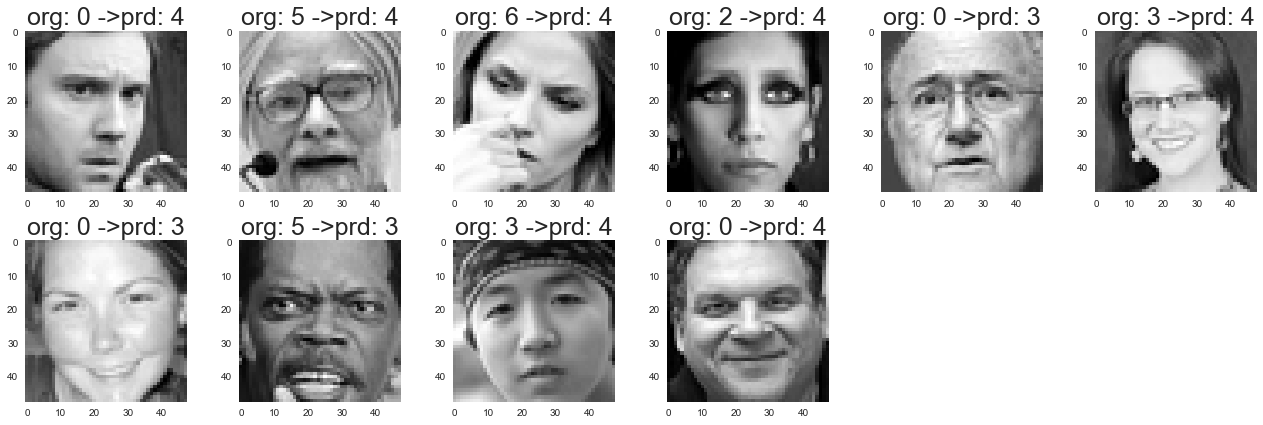

In [20]:
draw_result(Fa[:10])